## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

# 3. 구 별 등록인구 분석
### 서울시 내 각 구 별로 등록된 인구를 분석합니다.

In [1]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 데이터 안내

[데이터 파일명]
* 3. seoul_people.csv

[데이터 정보]
* 서울시 주민등록 데이터

[데이터 컬럼 정보]
* 한국인, 등록 외국인, 합계, 세대수, 고령인구수

# 3.1.데이터 불러오기

#### [3.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '3. seoul_people.csv'파일을 'seoul_people' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import pandas as pd

In [3]:
seoul_people = pd.read_table('seoul_people.csv', encoding='cp949')

In [4]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.shape

(28, 14)

# 3.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [3.2.1] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.describe()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
count,28,28,28,28,28,28,28,28,28,28,28,28,28,28
unique,2,27,27,28,28,28,28,28,28,28,28,28,24,27
top,2022.1/4,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
freq,26,2,2,1,1,1,1,1,1,1,1,1,2,2


In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


#### [3.2.2] 원하는 데이터 형태로 저장하기

* head, tail 등을 살펴본 결과를 토대로 header 값을 적절히 지정하여 데이터를 다시 불러오고 필요한 컬럼만 저장하세요

In [8]:
#read_csv 재실행. 단, header값을 적절히 지정
seoul_people.columns = [x+" "+y if x!=y else x for x,y in zip(seoul_people.iloc[0], seoul_people.iloc[1])]
seoul_people = seoul_people[3:]
seoul_people.head()

,기간,자치구,세대,합계 계,합계 남자,합계 여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
5,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
6,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
7,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [9]:
# 다시 불러온 데이터프레임에서 여러분 각자가 사용하고자 하는 컬럼만 가져오세요.
seoul_people.drop('기간', axis=1, inplace=True)
seoul_people.set_index('자치구', inplace=True)
seoul_people

,세대,합계 계,합계 남자,합계 여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
자치구,,,,,,,,,,,,
종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.2,75719
강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961


In [10]:
seoul_people = seoul_people.apply(lambda x: pd.to_numeric(x, errors='coerce'))
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   세대        25 non-null     int64  
 1   합계 계      25 non-null     int64  
 2   합계 남자     25 non-null     int64  
 3   합계 여자     25 non-null     int64  
 4   한국인 계     25 non-null     int64  
 5   한국인 남자    25 non-null     int64  
 6   한국인 여자    25 non-null     int64  
 7   등록외국인 계   25 non-null     int64  
 8   등록외국인 남자  25 non-null     int64  
 9   등록외국인 여자  25 non-null     int64  
 10  세대당인구     25 non-null     float64
 11  65세이상고령자  25 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 2.5+ KB


In [11]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
seoul_people.to_csv('df_seoul_people.csv')

# 3.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [12]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [3.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

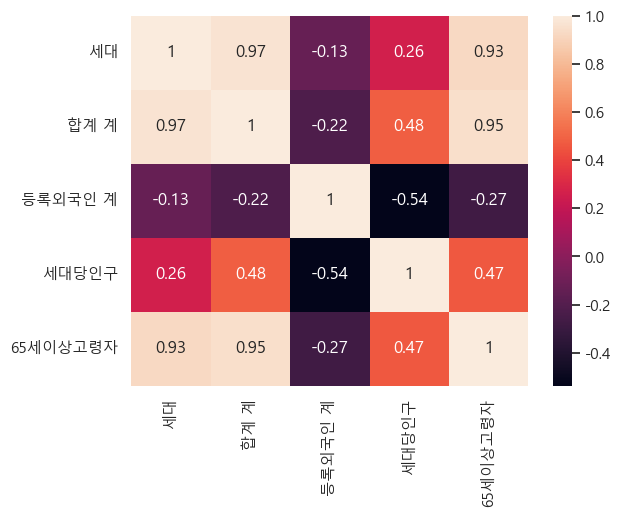

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.heatmap(seoul_people[['세대', '합계 계', '등록외국인 계', '세대당인구', '65세이상고령자']].corr(), annot=True)
plt.show()

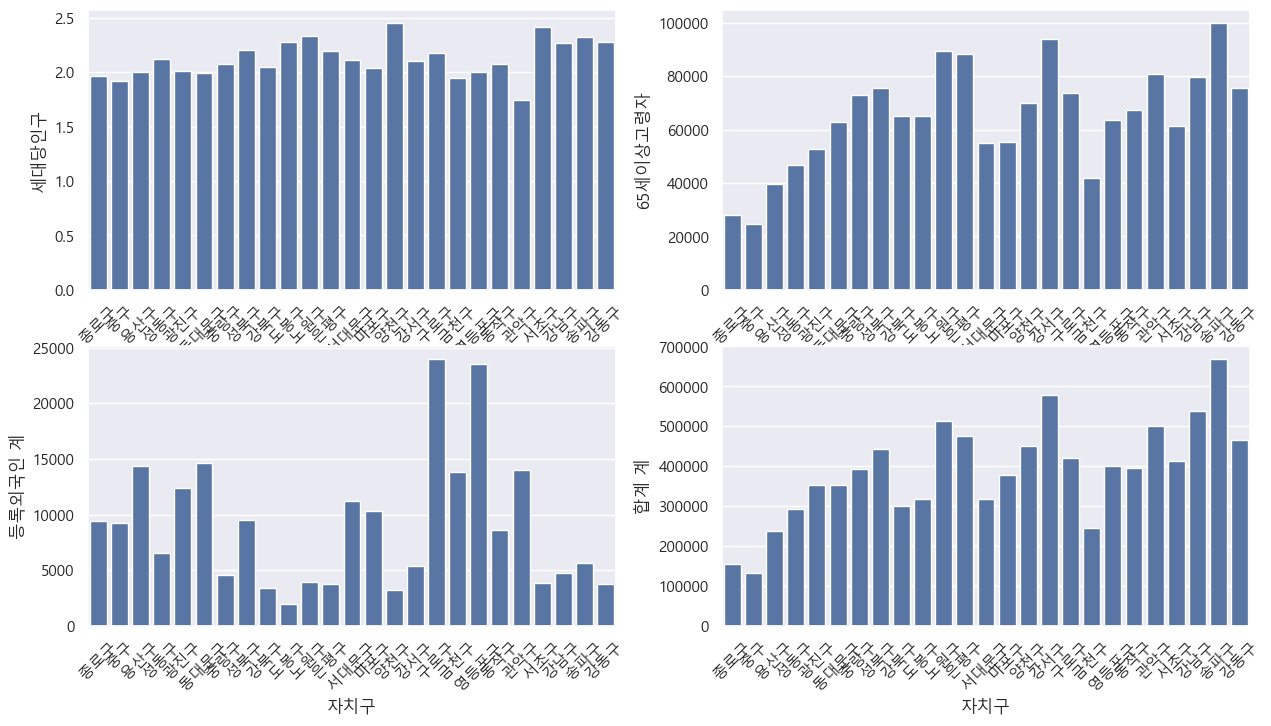

In [14]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.barplot(x="자치구", y="세대당인구", data=seoul_people)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(x="자치구", y="65세이상고령자", data=seoul_people)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(x="자치구", y="등록외국인 계", data=seoul_people)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(x="자치구", y="합계 계", data=seoul_people)
plt.xticks(rotation=45)

plt.show()

In [15]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 자치구의 인구의 편차가 크다.
# 2. 자치구의 등록외국인은 편차가 크다.
# 3. 등록외국인과 인구의 상관성이 적다.

---